# TME 10: Split and Merge

In [681]:
### Useful libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

### Data
img_test = np.full((64,64),150,dtype=np.uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = np.array(Image.open('img/angiogra.png'))
cam = np.array(Image.open('img/cameraman.png'))
muscle = np.array(Image.open('img/muscle.png'))
prisme = np.array(Image.open('img/prisme.png'))
seiche = np.array(Image.open('img/seiche.png'))

### Useful functions
def voisins(b,K):
    """ Blocstat*list[Blocstat]->list[Blocstat]
        retourne la liste des elements de K voisins de b
    """
    def estdans(x,y,a):
        """ int*int*Blocstat -> bool 
            Teste si (x,y) est dans a 
        """
        return x>=a[0] and y>=a[1] and x<a[0]+a[2] and y<a[1]+a[3]
    def sontvoisins(a,b):
        """ Blocstat**2 -> bool
            Teste si a et b sont voisins
        """
        if a[2]>b[2] and a[3]>b[3]:
            a,b=b,a
        x,y = a[0]+a[2]//2,a[1]+a[3]//2
        return estdans(x+a[2],y,b) or estdans(x-a[2],y,b) or estdans(x,y+a[3],b) or estdans(x,y-a[3],b)
    N = []
    for n in K:
        if sontvoisins(b,n):
            N.append(n)
    return N

def imshow(I,title=None,size=500):
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

## Exercice 1

### Question 1
Écrire la fonction récursive ``split()`` vue en TD. Elle prend en entrée l'image, une région, un prédicat, et un nombre variable d'arguments. La région est de type formel Python ```Bloc``` défini par :
```python
#type Bloc = tuple[int**4]
```
La fonction ``split()`` retourne un arbre 4-aire de type formel Python, défini récursivement par:
```python
#type 4-aire = list[(4-aire**4|Bloc)] 
```
Le prédicat est une fonction Python de signature:
```python
#Array*Bloc*...->bool
```
Elle peut prendre un nombre variable de paramètres qui correspond aux paramètres du prédicat.

In [696]:
def split(I,reg,pred,*args):
    x1, y1, x2, y2 = reg
    # s'assurer que la région soit bien dans les limites de l'image
    if (x2,y2) == I.shape:
        x2 -= 1
        y2 -= 1
    if pred(I,reg,*args) and lenOk()
        # séparer quatre zones dans la région considérée
        NO = split(I,(x1,y1,x1+(x2-x1)//2,y1+(y2-y1)//2),pred,*args) # séparer récursivement quatre zones au nord-ouest
        NE = split(I,(x1,y1+(y2-y1)//2+1,x1+(x2-x1)//2,y2),pred,*args) # séparer récursivement quatre zones au nord-est
        SO = split(I,(x1+(x2-x1)//2+1,y1,x2,y1+(y2-y1)//2),pred,*args) # séparer récursivement quatre zones au sud-ouest
        SE = split(I,(x1+(x2-x1)//2+1,y1+(y2-y1)//2+1,x2,y2),pred,*args) # séparer récursivement quatre zones au sud-est
        return [NO,NE,SO,SE]
    return [reg] # retourner l'arbre 4-aire sous forme de liste     

# petite note : d'autres binômes ont considéré qu'x2 et y2 représentaient la largeur et la hauteur d'une région ;
# pour nous, ce sont des valeurs absolues de positions de pixels

## Question 2
Écrire la fonction ```predsplit1(I,B,*args)``` de signature :
```python
Array*Bloc*... -> bool
```
qui retourne True si l'écart-type de l'image ``I`` calculé sur la région ``reg`` est plus grand que la valeur du premier argument de ``*args`` (on y accède simplement par ``*args[0]``).

In [683]:
def predsplit(I,reg,*args):
    # args[0] contient le seuil au-delà duquel on considère que l'écart-type est trop fort pour une région unique
    x1, y1, x2, y2 = reg
    return np.std(I[x1:x2,y1:y2]) > args[0] # booléen

### Question 3
Écrire la fonction ``splitprof(L)`` qui réalise un parcours (récursif) en profondeur de l'arbre 4-aire passé en paramètre. La fonction retourne la liste des feuilles de ``L``, soit une liste de bloc.

In [684]:
def splitprof(L):
    # "aplatir" l'arbre : retourner la liste de ses feuilles
    res=[]
    if len(L)==1:
        # ceci est une feuille
        return L
    else:
        # considérer récursivement les feuilles des quatre feuilles
        return splitprof(L[0])+splitprof(L[1])+splitprof(L[2])+splitprof(L[3]) 
    return res

### Question 4
Tester vos codes sur l'image test ``img_test`` vue en TD. Imprimer la valeur retournée par ``split()`` ainsi que celle retournée par ``profsplit()``. 

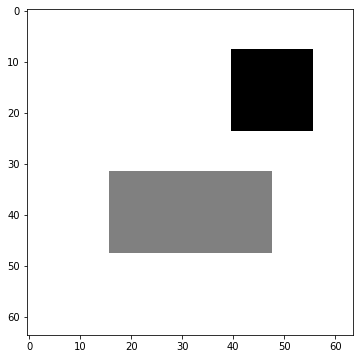


Arbre : [[(0, 0, 31, 31)], [[[(0, 32, 7, 39)], [(0, 40, 7, 47)], [(8, 32, 15, 39)], [(8, 40, 15, 47)]], [[(0, 48, 7, 55)], [(0, 56, 7, 63)], [(8, 48, 15, 55)], [(8, 56, 15, 63)]], [[(16, 32, 23, 39)], [(16, 40, 23, 47)], [(24, 32, 31, 39)], [(24, 40, 31, 47)]], [[(16, 48, 23, 55)], [(16, 56, 23, 63)], [(24, 48, 31, 55)], [(24, 56, 31, 63)]]], [[(32, 0, 47, 15)], [(32, 16, 47, 31)], [(48, 0, 63, 15)], [(48, 16, 63, 31)]], [[(32, 32, 47, 47)], [(32, 48, 47, 63)], [(48, 32, 63, 47)], [(48, 48, 63, 63)]]]

Feuilles : [(0, 0, 31, 31), (0, 32, 7, 39), (0, 40, 7, 47), (8, 32, 15, 39), (8, 40, 15, 47), (0, 48, 7, 55), (0, 56, 7, 63), (8, 48, 15, 55), (8, 56, 15, 63), (16, 32, 23, 39), (16, 40, 23, 47), (24, 32, 31, 39), (24, 40, 31, 47), (16, 48, 23, 55), (16, 56, 23, 63), (24, 48, 31, 55), (24, 56, 31, 63), (32, 0, 47, 15), (32, 16, 47, 31), (48, 0, 63, 15), (48, 16, 63, 31), (32, 32, 47, 47), (32, 48, 47, 63), (48, 32, 63, 47), (48, 48, 63, 63)]


In [685]:
# diviser l'image de test en arbre 4-aire
tree = split(img_test,(0,0,img_test.shape[0],img_test.shape[1]),predsplit,[2])
# renvoyer l'arbre aplati
blocs = splitprof(tree)

imshow(img_test)
print("\nArbre :",tree)
print("\nFeuilles :",blocs)
# d'un affichage à l'autre, on note la disparition des crochets d'ordre >2 : c'est ce qu'il faut.

### Question 4
Écrire la fonction ```splitdraw(L,I)``` qui prend en paramètre une liste de blocs et une image et retourne une image dont les bords de chaque élément de ``L`` ont été dessinés en rouge.  
Indication: l'image retournée est une hypermatrice de dimension 3, la troisième dimension a une taille de 3 et correspond aux composantes rouge, verte et bleue d'une image RGB. Tester son bon fonctionnement sur l'exemple précédent.

In [686]:
def splitdraw(L,I):
    green = [140,231,231] # pour moins de stress visuel
    Ic = I.copy()
    # standardiser l'intensité, puis ajouter la troisième dimension
    Ic = (255/np.max(Ic)*Ic).astype(int)
    Ic = np.expand_dims(Ic,axis = 2)
    # dupliquer la valeur d'intensité ([I] >>>> [I,I,I])
    Ic = np.repeat(Ic,3,axis=2)
    for l in L:
        x1,y1,x2,y2 = l
        # lancer le tracé
        Ic[x1,y1:y2+1] = green
        Ic[x2,y1:y2+1] = green
        Ic[x1:x2+1,y1] = green
        Ic[x1:x2+1,y2] = green
    return Ic

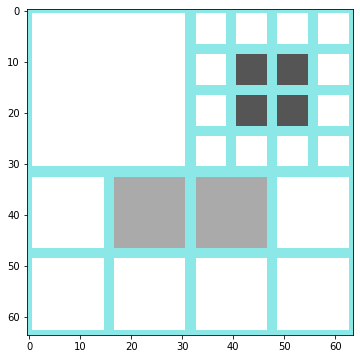

In [687]:
imshow(splitdraw(blocs,img_test))

### Question 5
Ajouter un bruit gaussien sur l'image ``img_test`` d'écart-type 5. Recalculer un découpage 4-aire sur l'image bruitée en ajustant le seuil de façon à obtenir le même résultat que dans la question précédente. Quelle valeur de seuil a-t-il fallut choisir ? Cela vous semble-t-il cohérent ?

Indication: utiliser la fonction Numpy ``random.randn()`` qui génère des valeurs aléatoires tirées selon une loi normale (loi gaussienne de moyenne nulle et de variance 1). Pour obtenir des réalisations d'une gaussienne d'écart type $\sigma$, il suffit de faire des tirages d'une loi normale, multipliés par $\sigma$. 

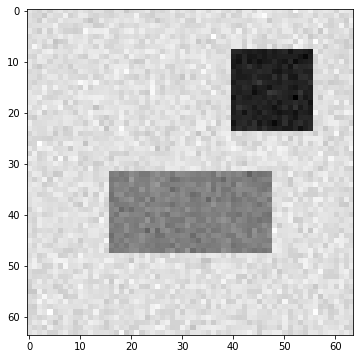

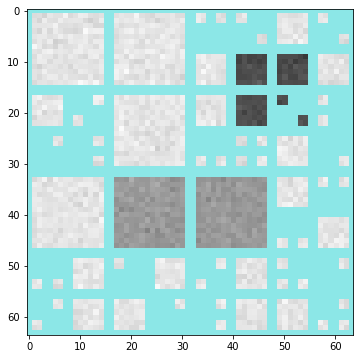

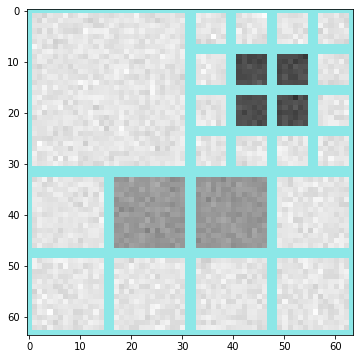

In [691]:
sigma = 5 # écart-type 
# la moyenne du bruit sera nulle (loi normale)

# génération du bruit
bruit = np.random.randn(img_test.shape[0],img_test.shape[1])*sigma
gresille = img_test + bruit
imshow(gresille)

# seuil insuffisant
tree = split(gresille,(0,0,img_test.shape[0],img_test.shape[1]),predsplit,[5])
blocs = splitprof(tree)
imshow(splitdraw(blocs,gresille))

# seuil satisfaisant
tree = split(gresille,(0,0,img_test.shape[0],img_test.shape[1]),predsplit,[6])
blocs = splitprof(tree)
imshow(splitdraw(blocs,gresille))

# Donner un seuil de 6 est logique : 
# il s'agit d'aller juste un peu plus haut que l'écart-type de la gaussienne 
# pour considérer qu'on a quelque chose d'homogène malgré le bruit.

# Exercice 2
Question 1:
Expérimenter l'algorithme de split sur les 4 images naturelles fournies. Pour chaque image essayer de trouver le seuil qui vous semble visuellement le meilleur. Afficher le nombre de bloc obtenus après découpage.

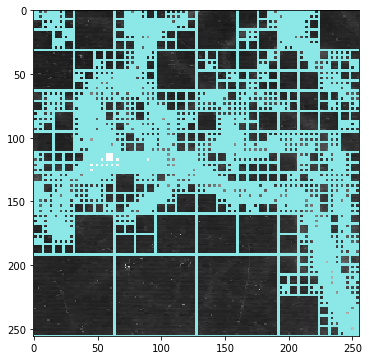

3919 blocs au total


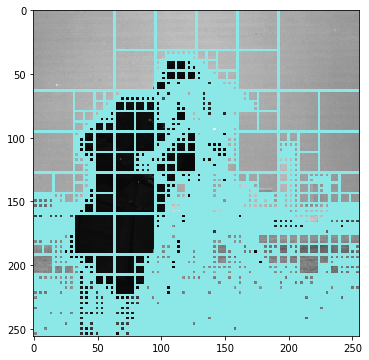

5782 blocs au total


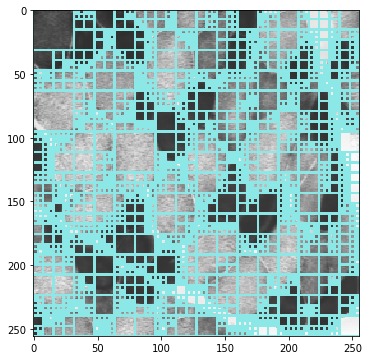

3229 blocs au total


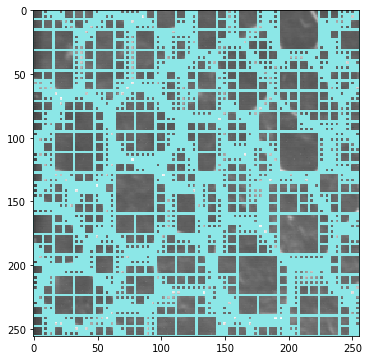

4531 blocs au total


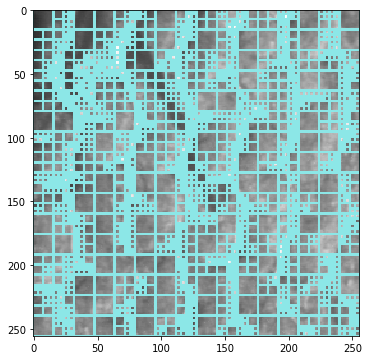

3433 blocs au total


In [695]:
imangio = np.array(Image.open('img/angiogra.png'))
treeang = split(imangio,(0,0,imangio.shape[0],imangio.shape[1]),predsplit,[9])
blocsang = splitprof(treeang)
splitang = splitdraw(blocsang,imangio)
imshow(splitang)
print(len(blocsang),"blocs au total")

imcamera = np.array(Image.open('img/cameraman.png'))
treecam = split(imcamera,(0,0,imcamera.shape[0],imcamera.shape[1]),predsplit,[8])
blocscam = splitprof(treecam)
splitcam = splitdraw(blocscam,imcamera)
imshow(splitcam)
print(len(blocscam),"blocs au total")

immuscle = np.array(Image.open('img/muscle.png'))
treemus = split(immuscle,(0,0,immuscle.shape[0],immuscle.shape[1]),predsplit,[20])
blocsmus = splitprof(treemus)
splitmus = splitdraw(blocsmus,immuscle)
imshow(splitmus)
print(len(blocsmus),"blocs au total")

imprisme = np.array(Image.open('img/prisme.png'))
treepri = split(imprisme,(0,0,imprisme.shape[0],imprisme.shape[1]),predsplit,[12])
blocspri = splitprof(treepri)
splitpri = splitdraw(blocspri,imprisme)
imshow(splitpri)
print(len(blocspri),"blocs au total")

imseiche = np.array(Image.open('img/seiche.png'))
treesei = split(imseiche,(0,0,imseiche.shape[0],imseiche.shape[1]),predsplit,[10])
blocssei = splitprof(treesei)
splitsei = splitdraw(blocssei,imseiche)
imshow(splitsei)
print(len(blocssei),"blocs au total")

# L'idée lors du choix du seuil est d'obtenir un treillis qui couvre toutes les zones d'intérêt, 
# de sorte que l'on ne puisse plus observer de frontières d'objets qui soient en dehors dudit treillis.
# Par exemple, sur le photographe photographié,
# il a fallu choisir la plus petite valeur entière qui permette d'isoler le phare à l'arrière-plan
# (le phare est difficile à reconnaître comme un objet, puisqu'il est perdu dans la couleur du ciel)
# sans aller trop loin dans les divisions des autres zones.

## Exercice 3
### Question 1
Modifier la fonction ``splitprof(L)`` pour en faire une fonction ``splitprofstat(L,I)`` qui rend une liste de feuilles de l'arbre 4-aire ``L`` et telle que chaque élément de cette liste, de type ``Bloc``, est enrichi de trois scalaires, le premier étant la taille, le second la moyenne et la troisième la variance des valeurs de pixels du bloc dans l'image ``I``. Cette fonction rend alors une liste dont les éléments ont pour type formel:
```python
type Blocstat = tuple[int**4,int,float**2]
```
Les quatre premières valeurs sont celles du type ``Bloc``, la cinquième est la taille du bloc (en nombre de pixels) et les deux dernières correspondent à la moyenne et la variance calculées sur la région.


In [571]:
def splitprofstats(L,I):
    res = []
    for x1,y1,x2,y2 in L:
        res.append([x1,y1,x2,y2,(x2-x1+1)*(y2-y1+1),np.mean(I[x1:x2,y1:y2]),np.var(I[x1:x2,y1:y2])])
        #           frontières        taille               moyenne              variance
    return res

### Question 2
Dans la suite du TME, on considère le type formel:
```python
type Region = list[Blocstat]
```
Une région, comme vu au TME, est donc une liste de blocs. Écrire le prédicat de fusion ``predmerge(b,R,*args)`` vu en TD. Cette fonction retourne ```True``` si le bloc ``b`` doit fusionner dans la région ``R``. Si telle est le cas, alors le premier élément de la liste ``R`` voit ses statistiques modifiées: elles décrivent celles de l'ensemble des blocs de la région ainsi fusionnée.

In [572]:
def predmerge(b,R,*args):
    # statistiques de la région R
    vreg = R[0][6]
    mreg = R[0][5]
    treg = R[0][4]
    # statistiques du bloc candidat
    vb = b[6]
    mb = b[5]
    tb = b[4]
    # observons l'écart entre les moyennes : s'il est valable, mettre à jour les statistiques générales de la région
    if np.abs(mb-mreg) < args[0]:  
        newmreg = (treg * mreg + tb * mb) / (treg + tb) 
        newvreg = (treg * (vreg + mreg**2) + tb * (vb + mb**2)) / (treg + tb) - newmreg**2
        newtreg = treg + tb
        R[0][4] = newtreg
        R[0][5] = newmreg
        R[0][6] = newvreg
        # ajouter le bloc à la région
        R.append(b)
        # et être content
        return True
    return False

### Question 3
À l'aide de `predmerge()` et de la fonction `voisins()`, donnée au début du notebook, implémenter la fonction de fusion vues en TD (Exercice 3.3).

Rappels sur les listes Python:
- Initialisation: `L = []`  (liste vide),
- Ajout de l'élément `a` à la liste `L`: `L.append(a)`,
- Suppression du même élément: `L.remove(a)`,
- Accès aux éléments d'une liste: identique aux tableaux Numpy.

In [697]:
def merge(S,I,pred,*args):
    # générer la liste des régions avec leurs statistiques
    R = splitprof(S)
    R = splitprofstats(R,I)
    
    mer = []
    while (len(R) > 0):
        reg = [R[0]] # considérer la première région de la liste
        R = R[1:] # considérer le reste de la liste
        nei = voisins(reg[0],R) # trouver les blocs voisins de la région dans la liste
        for b in nei:  
            if pred(b,reg,*args): # valide pour fusion ?
                reg.append(b) # ajouter le bloc à la région
                R.remove(b) # sortir le bloc de la liste d'attente
        mer.append(reg) # lister la région comme traitée
    return mer

### Question 4
Faire la mise au point des fonctions précédentes à l'aide de l'image img_test.

In [698]:
res = merge(split(img_test,(0,0,img_test.shape[0],img_test.shape[1]),predsplit,[1]),img_test,predmerge,[1])
print(res)

# validé

[[[0, 0, 31, 31, 1088, 150.0, 0.0], [8, 32, 15, 39, 64, 150.0, 0.0], [8, 32, 15, 39, 64, 150.0, 0.0]], [[0, 32, 7, 39, 192, 150.0, 0.0], [0, 48, 7, 55, 64, 150.0, 0.0], [0, 48, 7, 55, 64, 150.0, 0.0], [0, 56, 7, 63, 64, 150.0, 0.0], [0, 56, 7, 63, 64, 150.0, 0.0]], [[0, 40, 7, 47, 128, 150.0, 0.0], [8, 56, 15, 63, 64, 150.0, 0.0], [8, 56, 15, 63, 64, 150.0, 0.0]], [[8, 40, 15, 47, 192, 50.0, 0.0], [16, 40, 23, 47, 64, 50.0, 0.0], [16, 40, 23, 47, 64, 50.0, 0.0], [16, 48, 23, 55, 64, 50.0, 0.0], [16, 48, 23, 55, 64, 50.0, 0.0]], [[8, 48, 15, 55, 64, 50.0, 0.0]], [[16, 32, 23, 39, 1152, 150.0, 0.0], [24, 32, 31, 39, 64, 150.0, 0.0], [24, 32, 31, 39, 64, 150.0, 0.0], [24, 40, 31, 47, 64, 150.0, 0.0], [24, 40, 31, 47, 64, 150.0, 0.0], [16, 56, 23, 63, 64, 150.0, 0.0], [16, 56, 23, 63, 64, 150.0, 0.0], [24, 48, 31, 55, 64, 150.0, 0.0], [24, 48, 31, 55, 64, 150.0, 0.0], [24, 56, 31, 63, 64, 150.0, 0.0], [24, 56, 31, 63, 64, 150.0, 0.0], [32, 48, 47, 63, 256, 150.0, 0.0], [32, 48, 47, 63, 256

### Question 5
Écrire une fonction ``regions(LR,shape)`` qui prend une liste de régions telle que rendu par la fonction ``merge()`` et rend une image des régions. Chaque région sera colorée avec le niveau de gris correspondant à la moyenne de la région. Le paramètre ``shape`` donne la taille de l'image à produire. Tester la fonction sur l'exemple précédent.

In [658]:
def regions(LR,shape):
    I = np.zeros(shape)
    for region in LR: # pour chaque région reconnue
        for r in region: # pour chaque bloc de cette région
            I[r[0]:r[2]+1,r[1]:r[3]+1] = r[5] # dessiner ses frontières, et le remplir de sa couleur moyenne
    return I 

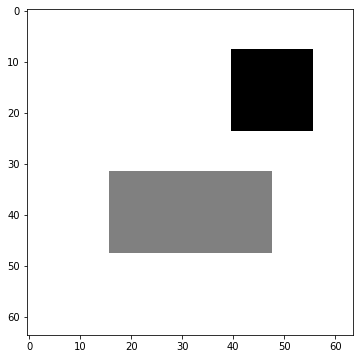

In [699]:
imshow(regions(res,(I.shape[0],I.shape[1])))
# formidable ?

## Exercice 4: expérimentation
### Question 1
Tester la fonction ``merge()`` sur les images ``angio``, ``cam``, ``muscle``, ``prisme`` et ``seiche``.

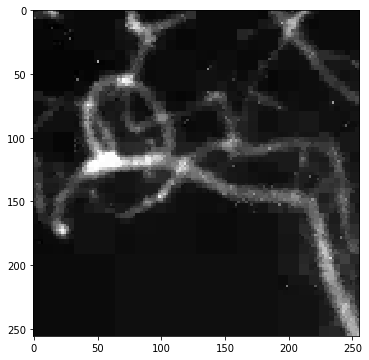

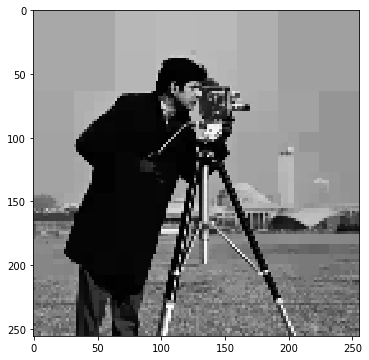

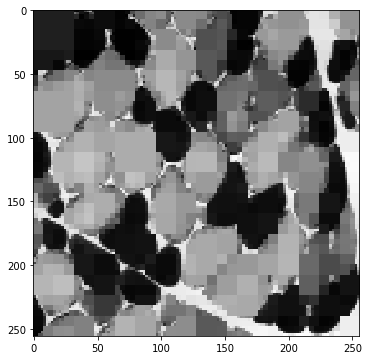

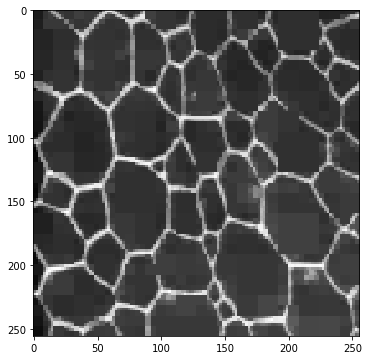

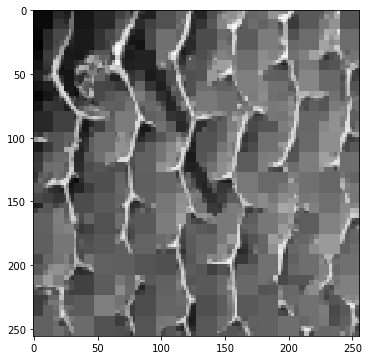

In [703]:
# Les arguments *args (une seule valeur) de split et de merge sont récupérés sur les tests d'optimisation effectués plus haut :

mergeang = merge(split(imangio,(0,0,imangio.shape[0],imangio.shape[1]),predsplit,[9]),imangio,predmerge,[9])
imshow(regions(mergeang,imangio.shape))

mergecam = merge(split(imcamera,(0,0,imcamera.shape[0],imcamera.shape[1]),predsplit,[8]),imcamera,predmerge,[8])
imshow(regions(mergecam,imcamera.shape))

mergemus = merge(split(immuscle,(0,0,immuscle.shape[0],immuscle.shape[1]),predsplit,[20]),immuscle,predmerge,[20])
imshow(regions(mergemus,immuscle.shape))

mergepri = merge(split(imprisme,(0,0,imprisme.shape[0],imprisme.shape[1]),predsplit,[12]),imprisme,predmerge,[12])
imshow(regions(mergepri,imprisme.shape))

mergesei = merge(split(imseiche,(0,0,imseiche.shape[0],imseiche.shape[1]),predsplit,[10]),imseiche,predmerge,[10])
imshow(regions(mergesei,imseiche.shape))

# validé

### Question 2
La fusion dépend de la façon dont on visite les régions. On peut alors faire un tri des feuilles de l'arbre 4-aire, par exemple, des blocs les plus gros aux plus petits, ou le contraire (utiliser la fonction Python ``sorted()``). La même question peut se poser lorsqu'on calcule l'ensemble des voisins de la région que l'on fusionne. Faut-il les trier ? Si oui, selon quel critère ? leur taille ? leur proximité ? Evidemment il n'y a pas de réponse universelle mais adaptée à chaque type de problème. Faites quelques tests pour voir l'influence de ces tris sur le résultat de la fusion.

In [671]:
# ************************* EDIT EN COURS ***********************************

# à supposer que l'on trie sur la taille, la condition doit être
def takeFourth(elem):
    return elem[4]

def mergeCond(S,I,pred,c,r,*args):
    # de nouveaux arguments :
    # c représente la condition de tri sur merge
    # r, l'ordre de tri (ascendant ? descendant ? par défaut ascendant quand r = False)
    R = splitprof(S)
    R = splitprofstats(R,I)
    R = sorted(R, key = c, reverse = r)
    fin=[]
    while(len(R)>0):
        reg = [R[0]]
        R = R[1:]
        nei=voisins(reg[0],R)
        for b in nei:  
            if pred(b,reg,*args):
                reg.append(b)
                R.remove(b) 
        fin.append(reg)
    return fin

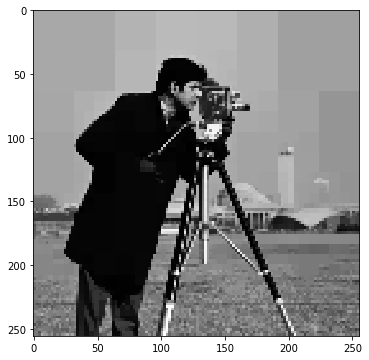

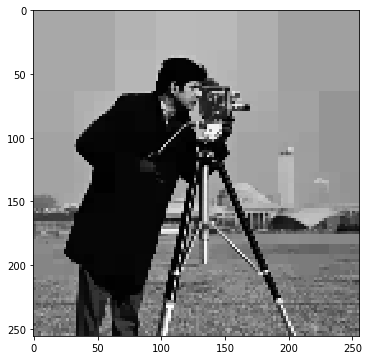

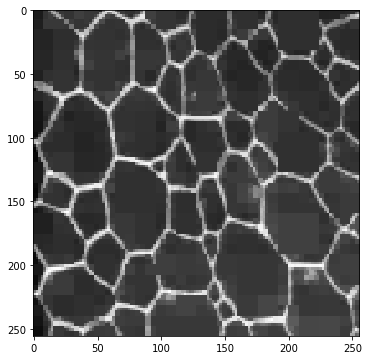

In [705]:
# on pourrait s'intéresser au visage du photographe (niveau de détail ?) sous plusieurs paradigmes de tri

# tri ascendant des blocs à fusionner selon leur taille
mergecam = mergeCond(split(imcamera,(0,0,imcamera.shape[0],imcamera.shape[1]),predsplit,[8]),imcamera,predmerge,takeFourth,False,[8])
imshow(regions(mergecam,imcamera.shape))
# plus homogène ?..
# tri descendant des blocs à fusionner selon leur taille
mergecam = mergeCond(split(imcamera,(0,0,imcamera.shape[0],imcamera.shape[1]),predsplit,[8]),imcamera,predmerge,takeFourth,True,[8])
imshow(regions(mergecam,imcamera.shape))
# change rien ?..

# ajouter des conditions de tri sur l'ordre des voisins ?